# Instalasi library

In [1]:
# Instal Tensorflow
!pip install transformers tensorflow nltk numpy opencv-python easyocr pytesseract
!sudo apt install tesseract-ocr
!pip install tensorflow==2.11

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 20.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2

In [1]:
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-ind # untuk bahasa Indonesia

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,537 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,515 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/

# Import Library

In [2]:
import numpy as np
import pandas as pd
import json
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import easyocr
import re
import pytesseract
import cv2
from nltk.corpus import wordnet
from transformers import BertTokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout, Bidirectional, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model


# Dataset

In [3]:
# Load dataset
# Dataset awal: Kalimat peringatan bahan alergen

texts = [
        "Produk ini mengandung kacang, susu, dan gluten.",
        "Tidak mengandung bahan alergen.",
        "Mengandung telur dan udang.",
        "Tidak ada bahan yang mengandung alergen.",
        "Mengandung kacang dan gluten.",
        "Bebas dari susu, telur, dan kacang.",
        "Produk ini mengandung udang dan gluten.",
        "Tidak ada kandungan bahan yang bisa menyebabkan alergi.",
        "Mengandung susu, telur, dan kacang.",
        "Makanan ini bebas dari gluten, telur, dan kacang.",
        "Dapat menyebabkan alergi jika mengandung kacang atau gluten.",
        "Alergen yang ditemukan adalah telur dan udang.",
        "Produk ini terjamin bebas dari bahan alergen.",
        "Ada bahan alergen di produk ini: susu dan udang.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: dapat mengandung telur, kedelai, kacang, hazel, dan kacang tanah.",
        "Bebas dari kacang, susu, telur, dan gluten, cocok untuk penderita alergi.",
        "Mengandung kedelai dan kacang tanah.",
        "Produk ini mengandung laktosa dan kacang.",
        "Bahan ini mengandung gluten dan kedelai.",
        "Mengandung kacang tanah dan susu, hati-hati bagi yang alergi.",
        "Produk ini bebas dari telur, susu, kacang, dan gluten.",
        "Alergen yang ditemukan adalah laktosa, kedelai, dan udang.",
        "Produk ini tidak mengandung bahan yang dapat menyebabkan alergi.",
        "Terdapat bahan alergen di dalamnya: kacang, kedelai, dan gluten.",
        "Mengandung laktosa, telur, dan kacang.",
        "Bebas dari bahan alergen, aman untuk penderita alergi.",
        "Produk ini terbuat dari bahan alami dan tidak mengandung bahan yang dapat menyebabkan alergi.",
        "Produk ini mengandung kacang tanah dan susu dalam kadar tinggi.",
        "Bebas dari bahan yang berpotensi menyebabkan alergi.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi kacang dan gluten.",
        "Produk ini mengandung udang, hati-hati bagi yang alergi udang dan kerang.",
        "Kandungan utama dari produk ini adalah laktosa, yang bisa berbahaya bagi orang dengan intoleransi laktosa.",
        "Dapat menyebabkan reaksi alergi jika mengandung kacang atau telur.",
        "Mengandung kacang tanah dan laktosa, hati-hati bagi yang alergi.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi udang.",
        "Tidak mengandung bahan yang bisa memicu alergi pada umumnya.",
        "Mengandung kacang dan gluten, mungkin berbahaya bagi penderita alergi.",
        "Bebas dari bahan berbahaya untuk orang dengan alergi terhadap kedelai dan kacang.",
        "Makanan ini terjamin bebas dari semua alergen yang umum ditemukan.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap kacang, telur, atau gluten.",
        "Makanan ini mengandung telur dan susu, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung gluten, sangat berbahaya bagi penderita alergi gluten.",
        "Mengandung kacang, hati-hati bagi penderita alergi kacang.",
        "Makanan ini mengandung gluten, jadi tidak aman bagi penderita celiac.",
        "Produk ini mengandung kedelai, jadi tidak cocok untuk orang yang alergi kedelai.",
        "Makanan ini mengandung laktosa dan kacang tanah, hati-hati bagi yang alergi.",
        "Produk ini mengandung telur dan kacang tanah, hati-hati bagi yang alergi.",
        "Mengandung gluten dan susu, mungkin berbahaya bagi penderita alergi.",
        "Bebas dari bahan berbahaya bagi penderita alergi makanan.",
        "Makanan ini mengandung susu dan telur, hati-hati bagi yang alergi.",
        "Mengandung kedelai dan gluten, periksa label untuk informasi lebih lanjut.",
        "Produk ini mengandung bahan yang bisa menyebabkan alergi pada penderita alergi susu dan telur.",
        "Mengandung kacang",
        "Mengandung susu",
        "Mengandung gluten",
        "Mengandung telur",
        "Mengandung udang",
        "Mengandung kedelai",
        "Mengandung laktosa",
        "Mengandung kacang tanah",
        "Produk ini mengandung kacang",
        "Produk ini mengandung susu",
        "Produk ini mengandung gluten",
        "Produk ini mengandung telur",
        "Produk ini mengandung udang",
        "Produk ini mengandung kedelai",
        "Produk ini mengandung laktosa",
        "Produk ini mengandung kacang tanah",
        "Bahan ini mengandung kacang",
        "Bahan ini mengandung susu",
        "Bahan ini mengandung gluten",
        "Bahan ini mengandung telur",
        "Bahan ini mengandung udang",
        "Bahan ini mengandung kedelai",
        "Bahan ini mengandung laktosa",
        "Bahan ini mengandung kacang tanah",
        "Alergen yang ditemukan adalah kacang",
        "Alergen yang ditemukan adalah susu",
        "Alergen yang ditemukan adalah gluten",
        "Alergen yang ditemukan adalah telur",
        "Alergen yang ditemukan adalah udang",
        "Alergen yang ditemukan adalah kedelai",
        "Alergen yang ditemukan adalah laktosa",
        "Alergen yang ditemukan adalah kacang",
        "Produk ini mengandung kacang, hati-hati bagi yang alergi.",
        "Produk ini mengandung susu, hati-hati bagi yang alergi.",
        "Produk ini mengandung gluten, hati-hati bagi yang alergi.",
        "Produk ini mengandung telur, hati-hati bagi yang alergi.",
        "Produk ini mengandung udang, hati-hati bagi yang alergi.",
        "Produk ini mengandung kedelai, hati-hati bagi yang alergi.",
        "Produk ini mengandung laktosa, hati-hati bagi yang alergi.",
        "Produk ini mengandung kacang tanah, hati-hati bagi yang alergi.",
        "Terdapat bahan alergen di dalamnya: kacang.",
        "Terdapat bahan alergen di dalamnya: susu.",
        "Terdapat bahan alergen di dalamnya: gluten.",
        "Terdapat bahan alergen di dalamnya: telur.",
        "Terdapat bahan alergen di dalamnya: udang.",
        "Terdapat bahan alergen di dalamnya: kedelai.",
        "Terdapat bahan alergen di dalamnya: laktosa.",
        "Terdapat bahan alergen di dalamnya: kacang tanah.",
        "Mengandung kacang, hati-hati bagi penderita alergi kacang.",
        "Mengandung susu, hati-hati bagi penderita alergi susu.",
        "Mengandung gluten, hati-hati bagi penderita alergi gluten.",
        "Mengandung telur, hati-hati bagi penderita alergi telur.",
        "Mengandung udang, hati-hati bagi penderita alergi udang.",
        "Mengandung kedelai, hati-hati bagi penderita alergi kedelai.",
        "Mengandung laktosa, hati-hati bagi penderita alergi laktosa.",
        "Mengandung kacang tanah, hati-hati bagi penderita alergi kacang tanah.",
        "Mengandung kacang, mungkin berbahaya bagi penderita alergi.",
        "Mengandung susu, mungkin berbahaya bagi penderita alergi.",
        "Mengandung gluten, mungkin berbahaya bagi penderita alergi.",
        "Mengandung telur, mungkin berbahaya bagi penderita alergi.",
        "Mengandung udang, mungkin berbahaya bagi penderita alergi.",
        "Mengandung kedelai, mungkin berbahaya bagi penderita alergi.",
        "Mengandung laktosa, mungkin berbahaya bagi penderita alergi.",
        "Mengandung kacang tanah, mungkin berbahaya bagi penderita alergi.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: dapat mengandung kacang.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: dapat mengandung susu.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: dapat mengandung gluten.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: dapat mengandung telur.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: dapat mengandung udang.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: dapat mengandung kedelai.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: dapat mengandung laktosa.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: dapat mengandung kacang tanah.",
        "Produk ini mengandung bahan yang bisa menyebabkan alergi pada penderita alergi kacang.",
        "Produk ini mengandung bahan yang bisa menyebabkan alergi pada penderita alergi susu.",
        "Produk ini mengandung bahan yang bisa menyebabkan alergi pada penderita alergi gluten.",
        "Produk ini mengandung bahan yang bisa menyebabkan alergi pada penderita alergi telur.",
        "Produk ini mengandung bahan yang bisa menyebabkan alergi pada penderita alergi udang.",
        "Produk ini mengandung bahan yang bisa menyebabkan alergi pada penderita alergi kedelai.",
        "Produk ini mengandung bahan yang bisa menyebabkan alergi pada penderita alergi laktosa.",
        "Produk ini mengandung bahan yang bisa menyebabkan alergi pada penderita alergi kacang tanah.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap kacang.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap susu.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap gluten.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap telur.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap udang.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap kedelai.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap laktosa.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap kacang tanah.",
        "Mengandung kacang, periksa label untuk informasi lebih lanjut.",
        "Mengandung susu, periksa label untuk informasi lebih lanjut.",
        "Mengandung gluten, periksa label untuk informasi lebih lanjut.",
        "Mengandung telur, periksa label untuk informasi lebih lanjut.",
        "Mengandung udang, periksa label untuk informasi lebih lanjut.",
        "Mengandung kedelai, periksa label untuk informasi lebih lanjut.",
        "Mengandung laktosa, periksa label untuk informasi lebih lanjut.",
        "Mengandung kacang tanah, periksa label untuk informasi lebih lanjut.",
        "Bebas dari bahan berbahaya untuk orang dengan alergi terhadap kacang.",
        "Bebas dari bahan berbahaya untuk orang dengan alergi terhadap susu.",
        "Bebas dari bahan berbahaya untuk orang dengan alergi terhadap gluten.",
        "Bebas dari bahan berbahaya untuk orang dengan alergi terhadap telur.",
        "Bebas dari bahan berbahaya untuk orang dengan alergi terhadap udang.",
        "Bebas dari bahan berbahaya untuk orang dengan alergi terhadap kedelai.",
        "Bebas dari bahan berbahaya untuk orang dengan alergi terhadap laktosa.",
        "Bebas dari bahan berbahaya untuk orang dengan alergi terhadap kacang tanah.",
        "Mengandung kacang dan susu, periksa label untuk informasi lebih lanjut.",
        "Mengandung susu dan gluten, periksa label untuk informasi lebih lanjut.",
        "Mengandung gluten dan telur, periksa label untuk informasi lebih lanjut.",
        "Mengandung telur dan udang, periksa label untuk informasi lebih lanjut.",
        "Mengandung udang dan kedelai, periksa label untuk informasi lebih lanjut.",
        "Mengandung kedelai dan laktosa, periksa label untuk informasi lebih lanjut.",
        "Mengandung laktosa dan kacang tanah, periksa label untuk informasi lebih lanjut.",
        "Mengandung kacang tanah dan kacang, periksa label untuk informasi lebih lanjut.",
        "Bebas dari bahan berbahaya untuk orang dengan alergi terhadap laktosa dan kacang tanah.",
        "Mengandung laktosa dan kacang tanah, periksa label untuk informasi lebih lanjut.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap laktosa dan kacang tanah.",
        "Produk ini mengandung bahan yang bisa menyebabkan alergi pada penderita alergi laktosa dan kacang tanah.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: dapat mengandung laktosa dan kacang tanah.",
        "Mengandung laktosa dan kacang tanah, mungkin berbahaya bagi penderita alergi.",
        "Bebas dari bahan berbahaya untuk orang dengan alergi terhadap kedelai dan kacang tanah.",
        "Mengandung kedelai dan kacang tanah, periksa label untuk informasi lebih lanjut.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap kedelai dan kacang tanah.",
        "Produk ini mengandung bahan yang bisa menyebabkan alergi pada penderita alergi kedelai dan kacang tanah.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: dapat mengandung kedelai dan kacang tanah.",
        "Mengandung kedelai dan kacang tanah, mungkin berbahaya bagi penderita alergi.",
        "Dapat menyebabkan alergi jika mengandung kacang.",
        "Dapat menyebabkan alergi jika mengandung susu.",
        "Dapat menyebabkan alergi jika mengandung gluten.",
        "Dapat menyebabkan alergi jika mengandung telur.",
        "Dapat menyebabkan alergi jika mengandung udang.",
        "Dapat menyebabkan alergi jika mengandung kedelai.",
        "Dapat menyebabkan alergi jika mengandung laktosa.",
        "Dapat menyebabkan alergi jika mengandung kacang tanah.",
        "Dapat menyebabkan alergi jika mengandung kacang, susu, dan gluten.",
        "Dapat menyebabkan alergi jika mengandung susu, gluten, dan telur.",
        "Dapat menyebabkan alergi jika mengandung gluten, telur, dan udang.",
        "Dapat menyebabkan alergi jika mengandung telur, udang, dan laktosa.",
        "Dapat menyebabkan alergi jika mengandung udang, kedelai, dan laktosa.",
        "Dapat menyebabkan alergi jika mengandung kedelai, laktosa, dan kacang tanah .",
        "Dapat menyebabkan alergi jika mengandung laktosa, kacang tanah, dan kacang.",
        "Dapat menyebabkan alergi jika mengandung kacang tanah, kacang, dan susu.",
]

labels = np.array([
    [1, 1, 1, 0, 0, 0, 0, 0],  # Kacang, Susu, Gluten /
        [0, 0, 0, 0, 0, 0, 0, 0],  # Tidak ada alergen /
        [0, 0, 0, 1, 1, 0, 0, 0],  # Telur, Udang /
        [0, 0, 0, 0, 0, 0, 0, 0],  # Tidak ada alergen /
        [1, 0, 1, 0, 0, 0, 0, 0],  # Kacang, Gluten /
        [0, 0, 0, 0, 0, 0, 0, 0],  # Bebas alergen /
        [0, 0, 1, 0, 1, 0, 0, 0],  # Udang, Gluten /
        [0, 0, 0, 0, 0, 0, 0, 0],  # Tidak ada alergen /
        [1, 1, 0, 1, 0, 0, 0, 0],  # Susu, Telur, Kacang /
        [0, 0, 0, 0, 0, 0, 0, 0],  # Bebas alergen /
        [1, 0, 1, 0, 0, 0, 0, 0],  # Kacang, Gluten /
        [0, 0, 0, 1, 1, 0, 0, 0],  # Telur, Udang /
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas alergen /
        [0, 1, 0, 0, 1, 0, 0, 0],  # Susu, Udang /
        [1, 0, 0, 1, 0, 1, 0, 0],  # Kacang, Telur, Kedelai /
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas alergen /
        [0, 0, 0, 0, 0, 1, 0, 1],  # kedelai, Kacang Tanah /
        [1, 0, 0, 0, 0, 0, 1, 0],  # laktosa, kacang /
        [0, 0, 1, 0, 0, 1, 0, 0],  # gluten, kedelai /
        [0, 1, 0, 0, 0, 0, 0, 1],  # kacang tanah, susu /
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas /
        [0, 0, 0, 0, 1, 1, 1, 0],  # laktosa, kedelai, udang /
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas /
        [1, 0, 1, 0, 0, 1, 0, 0],  # Kacang, kedelai, gluten /
        [1, 0, 0, 1, 0, 0, 1, 0],  # laktosa, telur, kacang /
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas /
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas /
        [0, 1, 0, 0, 0, 0, 0, 1],  # susu, kacang tanah
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas /
        [1, 0, 1, 0, 0, 0, 0, 0],  # kacang, gluten /
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang /
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa /
        [1, 0, 0, 1, 0, 0, 0, 0],  # kacang, telur /
        [0, 0, 0, 0, 0, 0, 1, 1],  # kacang tanah, laktosa/
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang/
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas alergi/
        [1, 0, 1, 0, 0, 0, 0, 0],  # kacang, gluten/
        [1, 0, 0, 0, 0, 1, 0, 0],  # kedelai, kacang/
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas /
        [1, 0, 1, 1, 0, 0, 0, 0],  # kacang, telur, gluten /
        [0, 1, 0, 1, 0, 0, 0, 0],  # telur, susu /
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten /
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang /
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten /
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai/
        [0, 0, 0, 0, 0, 0, 1, 1],  # laktosa, kacang tanah/
        [0, 0, 0, 1, 0, 0, 0, 1],  # telur, kacang tanah /
        [0, 1, 1, 0, 0, 0, 0, 0],  # gluten, susu /
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas /
        [0, 1, 0, 1, 0, 0, 0, 0],  # susu, telur /
        [0, 0, 1, 0, 0, 1, 0, 0],  # kedelai, gluten /
        [0, 1, 0, 1, 0, 0, 0, 0],  # susu, telur /
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas kacang
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas susu
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas gluten
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas telur
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas udang
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas kedelai
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas laktosa
        [0, 0, 0, 0, 0, 0, 0, 0],  # bebas kacang tanah
        [1, 1, 0, 0, 0, 0, 0, 0],  # kacang, susu
        [0, 1, 1, 0, 0, 0, 0, 0],  # susu, gluten
        [0, 0, 1, 1, 0, 0, 0, 0],  # gluten, telur
        [0, 0, 0, 1, 1, 0, 0, 0],  # telur, udang
        [0, 0, 0, 0, 1, 1, 0, 0],  # udang, kedelai
        [0, 0, 0, 0, 0, 1, 1, 0],  # kedelai, laktosa
        [0, 0, 0, 0, 0, 0, 1, 1],  # laktosa, kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah, kacang
        [0, 0, 0, 0, 0, 0, 1, 1],  # laktosa, kacang tanah
        [0, 0, 0, 0, 0, 0, 1, 1],  # laktosa, kacang tanah
        [0, 0, 0, 0, 0, 0, 1, 1],  # laktosa, kacang tanah
        [0, 0, 0, 0, 0, 0, 1, 1],  # laktosa, kacang tanah
        [0, 0, 0, 0, 0, 0, 1, 1],  # laktosa, kacang tanah
        [0, 0, 0, 0, 0, 0, 1, 1],  # laktosa, kacang tanah
        [0, 0, 0, 0, 0, 1, 0, 1],  # kedelai, kacang tanah
        [0, 0, 0, 0, 0, 1, 0, 1],  # kedelai, kacang tanah
        [0, 0, 0, 0, 0, 1, 0, 1],  # kedelai, kacang tanah
        [0, 0, 0, 0, 0, 1, 0, 1],  # kedelai, kacang tanah
        [0, 0, 0, 0, 0, 1, 0, 1],  # kedelai, kacang tanah
        [0, 0, 0, 0, 0, 1, 0, 1],  # kedelai, kacang tanah
        [1, 0, 0, 0, 0, 0, 0, 0],  # kacang
        [0, 1, 0, 0, 0, 0, 0, 0],  # susu
        [0, 0, 1, 0, 0, 0, 0, 0],  # gluten
        [0, 0, 0, 1, 0, 0, 0, 0],  # telur
        [0, 0, 0, 0, 1, 0, 0, 0],  # udang
        [0, 0, 0, 0, 0, 1, 0, 0],  # kedelai
        [0, 0, 0, 0, 0, 0, 1, 0],  # laktosa
        [0, 0, 0, 0, 0, 0, 0, 1],  # kacang tanah
        [1, 1, 1, 0, 0, 0, 0, 0],  # kacang, susu, gluten
        [0, 1, 1, 1, 0, 0, 0, 0],  # susu, gluten, telur
        [0, 0, 1, 1, 1, 0, 0, 0],  # gluten, telur, udang
        [0, 0, 0, 1, 1, 1, 0, 0],  # telur, udang, kedelai
        [0, 0, 0, 0, 1, 1, 1, 0],  # udang, kedelai, laktosa
        [0, 0, 0, 0, 0, 1, 1, 1],  # kedelai, laktosa, kacang tanah
        [1, 0, 0, 0, 0, 0, 1, 1],  # laktosa, kacang tanah, kacang
        [1, 1, 1, 0, 0, 0, 0, 1],  # kacang tanah, kacang, susu
])

#texts = pd.DataFrame(text)
#labels = pd.DataFrame(label)

# Simpan dataset ke file CSV
# texts.to_csv("texts.csv", index=False)
# labels.to_csv("labels.csv", index=False)

# # Load dataset untuk preprocessing
# texts = pd.read_csv("texts.csv")
# labels = pd.read_csv("labels.csv")

# Preprocessing Data

In [6]:
# Fungsi untuk pengacakan kata
def shuffle_words(text):
    words = text.split()
    random.shuffle(words)
    return " ".join(words)

# Fungsi untuk penghapusan kata
def delete_words(text, delete_prob=0.2):
    words = text.split()
    new_words = [word for word in words if random.random() > delete_prob]
    return " ".join(new_words)

# Fungsi untuk penyisipan kata
def insert_words(text, insert_prob=0.2, insert_words=["dan", "juga", "serta"]):
    words = text.split()
    new_words = words[:]
    for i in range(len(words)):
        if random.random() < insert_prob:
            new_words.insert(i, random.choice(insert_words))
    return " ".join(new_words)

In [7]:
# Pastikan WordNet sudah diunduh untuk data augmentasi
import nltk
nltk.download('wordnet')

def augment_text(text, n=1, probability=0.5):
    words = text.split()
    augmented_texts = []

    for _ in range(n):  # Ulangi augmentasi untuk menghasilkan beberapa variasi
        new_words = words.copy()
        for idx in range(len(new_words)):
            if random.random() < probability:  # Probabilitas augmentasi
                synonyms = [syn.lemmas()[0].name() for syn in wordnet.synsets(new_words[idx])]
                if synonyms:
                    synonym = random.choice(synonyms)
                    if synonym != new_words[idx]:  # Hanya ganti jika sinonim berbeda
                        new_words[idx] = synonym
        augmented_texts.append(" ".join(new_words))

    return augmented_texts



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
# Augmentasi data secara umum
augmented_texts = []
augmented_labels = []

for text, label in zip(texts, labels):
    augmented_texts.append(shuffle_words(text))
    augmented_texts.append(delete_words(text))
    augmented_texts.append(insert_words(text))

    augmented_labels.extend([label] * 3)

texts.extend(augmented_texts)
labels = np.vstack([labels, augmented_labels])

In [9]:
# Augmentasi khusus untuk kelas Kacang dan Kacang Tanah
kacang_texts = [text for text, label in zip(texts, labels) if label[0] == 1]  # Ambil data kelas Kacang
kacang_tanah_texts = [text for text, label in zip(texts, labels) if label[7] == 1]  # Data Kacang Tanah

augmented_kacang = []
augmented_kacang_tanah = []

# Augmentasi tambahan kacang
for text in kacang_texts:
    augmented_kacang.extend(augment_text(text, n=3))  # Tambahkan 3 variasi augmentasi

# Augmentasi tambahan kacang tanah
for text in kacang_tanah_texts:
    augmented_kacang_tanah.extend(augment_text(text, n=3))  # Tambahkan 3 variasi augmentasi

# Penggabungan augmentasi khusus ke dataset
texts.extend(augmented_kacang + augmented_kacang_tanah)
labels = np.vstack([
    labels,
    np.array([[1, 0, 0, 0, 0, 0, 0, 0]] * len(augmented_kacang)),  # Label Kacang
    np.array([[0, 0, 0, 0, 0, 0, 0, 1]] * len(augmented_kacang_tanah))  # Label Kacang Tanah
])

In [10]:
# Tokenisasi dan padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)  # Fit tokenizer pada data yang telah diaugmentasi
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')

# Konversi label menjadi array numpy
y = np.array(labels)

min_length = min(len(X), len(y))
X = X[:min_length]
y = y[:min_length]

# Split data menjadi training dan validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Multi-Layer Perceptron (MLP)

In [14]:
model = Sequential([
    Embedding(input_dim=1000, output_dim=128, input_length=50),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='sigmoid', kernel_regularizer='l2')

])

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 128)           128000    
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                409664    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                                 
Total params: 538,184
Trainable params: 538,184
Non-trainable params: 0
_________________________________________________________________


# Melatih model

In [16]:
# Training model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=4,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
317/317 [==============================] - 3s 6ms/step - loss: 0.4344 - accuracy: 0.4380 - val_loss: 0.3262 - val_accuracy: 0.5615
Epoch 2/50
317/317 [==============================] - 2s 6ms/step - loss: 0.2923 - accuracy: 0.6038 - val_loss: 0.2625 - val_accuracy: 0.5962
Epoch 3/50
317/317 [==============================] - 2s 6ms/step - loss: 0.2416 - accuracy: 0.6669 - val_loss: 0.2325 - val_accuracy: 0.6909
Epoch 4/50
317/317 [==============================] - 2s 6ms/step - loss: 0.2146 - accuracy: 0.7064 - val_loss: 0.2121 - val_accuracy: 0.7161
Epoch 5/50
317/317 [==============================] - 2s 6ms/step - loss: 0.1888 - accuracy: 0.7419 - val_loss: 0.1928 - val_accuracy: 0.7382
Epoch 6/50
317/317 [==============================] - 3s 9ms/step - loss: 0.1759 - accuracy: 0.7522 - val_loss: 0.1834 - val_accuracy: 0.7539
Epoch 7/50
317/317 [==============================] - 2s 6ms/step - loss: 0.1666 - accuracy: 0.7672 - val_loss: 0.1701 - val_accuracy: 0.7950
Epoch 

# Evaluasi model

In [17]:
y_pred = model.predict(X_val)
y_pred_binary = (y_pred > 0.5).astype(int)

# Cetak classification report
from sklearn.metrics import classification_report
allergen_labels = ["Kacang", "Susu", "Gluten", "Telur", "Udang", "Kedelai", "Laktosa", "Kacang Tanah"]
print("\nClassification Report:")
print(classification_report(y_val, y_pred_binary, target_names=allergen_labels))

10/10 [==============================] - 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

      Kacang       0.90      0.88      0.89       102
        Susu       1.00      0.40      0.57        25
      Gluten       1.00      0.44      0.61        25
       Telur       1.00      0.46      0.63        26
       Udang       1.00      0.85      0.92        20
     Kedelai       1.00      0.30      0.46        27
     Laktosa       1.00      0.18      0.31        22
Kacang Tanah       0.91      0.95      0.93       120

   micro avg       0.93      0.72      0.81       367
   macro avg       0.98      0.56      0.66       367
weighted avg       0.94      0.72      0.78       367
 samples avg       0.81      0.75      0.76       367



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


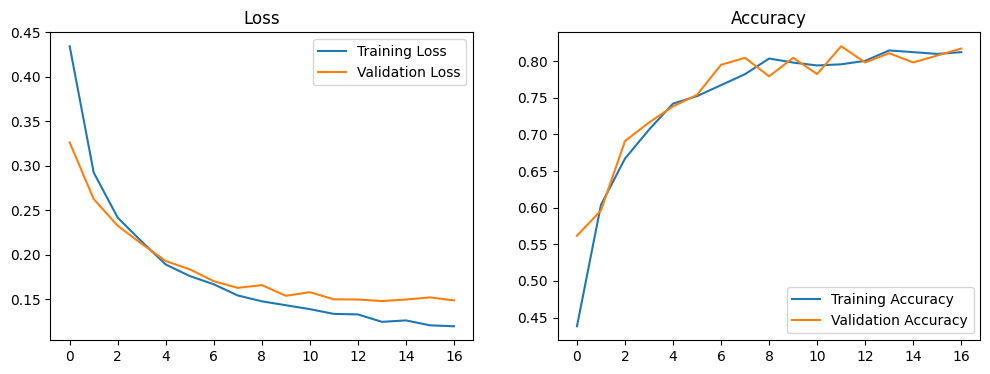

In [18]:
# Plot training & validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


# Menyimpan model

In [21]:
# Menyimpan model ke file .h5
model.save('model_alergify_2.h5')

# Ekstraksi teks dengan OCR-EasyOCR

In [22]:
def extract_text_from_image(image_path):
    reader = easyocr.Reader(['id'])  # bahasa Indonesia
    results = reader.readtext(image_path, detail=0)
    return " ".join(results)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # menghapus tanda baca
    return text

# Load model pre-trained
model = load_model('model_alergify_2.h5')

def predict_allergens(text, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=max_length, padding='post')
    predictions = model.predict(padded)
    return predictions

def pipeline(image_path, tokenizer, max_length):
    raw_text = extract_text_from_image(image_path)
    cleaned_text = preprocess_text(raw_text)
    predictions = predict_allergens(cleaned_text, tokenizer, max_length=50)

    # Daftar alergen
    allergens = ["Kacang", "Susu", "Gluten", "Telur", "Udang", "Kedelai", "Laktosa", "Kacang Tanah"]
    detected = [allergens[i] for i, prob in enumerate(predictions[0]) if prob > 0.5]
    return detected

In [23]:
# Contoh penggunaan
# # catatan: image path berasal dari masing-masing user
image_path = '/content/WhatsApp Image 2024-12-07 at 18.22.15 (1).jpeg'

extracted_text = extract_text_from_image(image_path)
print(f"Teks yang diekstrak: {extracted_text}")

# Prediksi dengan integrasi OCR dan model tensorflow
detected_allergens = pipeline(image_path, tokenizer, max_length=50)
print("Alergen yang terdeteksi:", detected_allergens)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteTeks yang diekstrak: INFORMASI NILAI GIZI Komposisl: Air; Cokelat Pelapis 24% , Takaran Seji: 65 (ml) Gula; Padatan Susu 6.7%, Minyak Sajian per Kemasan Nabati, Butiran Kacang 3.1% , JUMLAH PER SAJIAN Maltodekstrin Glukosa; Penstabil Energl Total 130 kkal Energl dari Lemak 80 kkal Nabati; Pengemulsi Nabati , Perisa Sintetik Vanila, Pewama Sintetk Lemak Total %AKCI (Tartrazin CI No 19140, Kuning FCF Kolesterol 0 CINo.15985) Lemak trans 0 9 Tanpa Pengawet Lemak tidak Jenuh tunggal 1 g 83 Lemak tidak jenuh ganda 9 9 Mengandung alergen; lihat daftar Lemak Jenuh 9 35 % bahan yang dicetak tebal. Protein 9 3 Dapat mengandung lesitin kedelai , 8 Kareonidemg Total ł 9 % kacang-kacangan; telur; dan gluten 2 Gula pangan 9 3 % 8 1999999129402 Garam (Natrium) 29 mg 2 % 2 "Porson AKGbordasarkan kobutuhun onorgi 2150kkal Kebutuhan energi Ande mungkin leblh (Inggi atau lebih rondeh. Ge 0*8vun 02 aguna : Sirup mg ~nX 75529954

# Ekstraksi teks dengan OCR-OpenCV

In [24]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Path ke Tesseract OCR


def extract_text_from_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray)
    return text


model = load_model('model_alergify_2.h5')

tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(["contoh teks untuk pelatihan"])


def predict_allergens(text, threshold=0.5):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=50, padding='post')
    prediction = model.predict(padded_seq)

    # Daftar alergen
    allergens = ["Kacang", "Susu", "Gluten", "Telur", "Udang", "Kedelai", "Laktosa", "Kacang Tanah"]
    detected_allergens = [allergens[i] for i in range(len(prediction[0])) if prediction[0][i] > threshold]
    return detected_allergens


In [25]:
# Contoh penggunaan
# # catatan: image path berasal dari masing-masing user
image_path = '/content/WhatsApp Image 2024-12-07 at 18.22.15 (1).jpeg'

extracted_text = extract_text_from_image(image_path)
print(f"Teks yang diekstrak: {extracted_text}")

# Prediksi
detected_allergens = predict_allergens(extracted_text)
print(f"Alergen yang terdeteksi: {detected_allergens}")

Teks yang diekstrak:  

  
 
 
 
 
 

     

es ag

4%

INFORMASI NILAI GIZI WOT Mee Cle aCe
P Se CER TCC Ic lS CR ia al ate
akaran Saji: 65 (mi) - =, x
4" Sajian per Kemasan Nabati, Butiran Kacang 3.1%, ,
Maitodekstrin, Sirup Glukosa, Penstabil

SHargeT 190 sic Energi dari Lemak 80 kkal Nabati, Pengemulsi po

a - = STi CL LAMM eda la sta ciel 2
ae (Tartrazin Cl.No.19140, Kuning FCF

0% Cl:No.15985).
Tanpa Pengawet.

 
 
 
 

Lemak Total
Kolesterol
Lemak trans

 
 

a

 
 
  

Lemak tidak jenuh tunggal
Lemak tidak jenuh ganda

Lemak Jenuh

Protein

Karbohidrat Total
Serat.pangan

Gulia

Garam (Natrium)

"Persen AKG berdasarkan kebutuhan energi.2150-kka
Kebutuhan energi Anda mungkin lebih tinggi atau lebih rendah.

Mengandung alergen, lihat daftar
bahan yang dicetak tebal:

Dapat mengandung lesitin kedela
kacang-kacangan, telur, dan gluten

oUt eit

  
   
 
 

_
C-HNANO820 ow

   

DO0o20ca 30

 

  

1/1 [==============================] - 0s 47ms/step
Alergen yang terdeteksi: ['Kacan

# Contoh input manual

In [26]:
# Contoh input teks
input_text = "Produk ini mengandung kacang tanah."

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequence = tokenizer.texts_to_sequences([input_text])
padded_sequence = pad_sequences(sequence, maxlen=100, padding='post')

predictions = model.predict(padded_sequence)

# Threshold interpretasi (misal untuk multi-label classification)
threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)
print("Kelas Terdeteksi:", predicted_classes)

# 1: mengandung alergen, 0: tidak
# Kelas : ["Kacang", "Susu", "Gluten", "Telur", "Udang", "Kedelai", "Laktosa", "Kacang Tanah"]

1/1 [==============================] - 0s 88ms/step
Kelas Terdeteksi: [[0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0]]
